# Comparison of Time Series Models

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error

In [5]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [6]:
import pmdarima as pm

## Data Import and Cleaning

In [7]:
df = pd.read_csv('data/DT_NSO_0600_019V1_-_2021-04-10_-_www.1212.mn.csv', thousands=',')

In [8]:
df.head(2)

,Goods and services,Aimag,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,"Rice, kg",Ulaanbaatar,1770.0,1740.0,1705.0,1705.0,1700.0,1675.0,1670.0,1655.0,...,3633,3618,3626,3578,3569,3649,3668,3663,3669,3671
1,"Bread, sliced, pieces",Ulaanbaatar,634.0,634.0,634.0,634.0,634.0,650.0,650.0,650.0,...,1288,1288,1282,1294,1290,1291,1284,1280,1280,1280


In [9]:
df = pd.melt(df, id_vars=['Goods and services','Aimag'], value_name='price',var_name='month')

In [10]:
df['Goods and services'].unique()

array(['Rice, kg', 'Bread, sliced, pieces',
       'Biscuits,150-180 g, imported',
       'Flour, first grade, packaged, kg, domestic',
       'Flour, second grade, packaged, kg, domestic',
       'Millet, plain, kg, imported', 'Beef, with bones, kg',
       'Beef, without bones, kg', 'Mutton, with bones, kg',
       'Goat meat, with bones, kg', 'Chicken, thigh, kg, imported',
       'Horse meat, with bones, kg', 'Milk, cows, plain, litre',
       'Milk, packed, carton box ,1 litre, domestic',
       'Yogurt, plain, 1 litre',
       'Aaruul, dried curdled milk, plain, with sugar, kg',
       'Egg, pieces, дотоодын', 'Vegetable oil, 1 litre, imported',
       'Mandarin, kg, imported', 'Apples, yellow, kg, imported',
       'Dried grapes, kg, imported', 'Cabbage, kg, imported',
       'Tomatoes, round, kg, imported', 'Sweet pepper, kg, imported',
       'Carrots, kg, imported', 'Onion, kg, imported',
       'Garlic, 1 bulb, imported', 'Potato, domestic, kg',
       'Sugar, plain, kg, imp

In [11]:
df = df[(df['Goods and services'] == 'Beef, with bones, kg') | (df['Goods and services'] == 'Mutton, with bones, kg')]

In [12]:
df = df.rename(columns={'Goods and services':'item'}).reset_index(drop=True)

In [13]:
df = df.drop(columns='Aimag')

In [14]:
df

,item,month,price
0,"Beef, with bones, kg",2010-12,4060.0
1,"Mutton, with bones, kg",2010-12,3710.0
2,"Beef, with bones, kg",2011-01,4800.0
3,"Mutton, with bones, kg",2011-01,4205.0
4,"Beef, with bones, kg",2011-02,4800.0
...,...,...,...
241,"Mutton, with bones, kg",2020-12,8579.0
242,"Beef, with bones, kg",2021-01,11614.0
243,"Mutton, with bones, kg",2021-01,9034.0
244,"Beef, with bones, kg",2021-02,12606.0


In [15]:
df['month'] = pd.to_datetime(df['month'])

In [16]:
beef = df[df['item'] == 'Beef, with bones, kg']
mutton = df[df['item'] == 'Mutton, with bones, kg']

## Visualize Time Series

In [17]:
mutton.dtypes

item             object
month    datetime64[ns]
price           float64
dtype: object

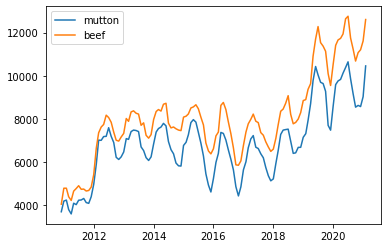

In [18]:
plt.plot(mutton['month'], mutton['price'])
plt.plot(beef['month'], beef['price'])
plt.legend(['mutton','beef'])

## Split Data

In [19]:
train_b = beef[:-12]
test_b = beef[-12:]

In [20]:
train_m = mutton[:-12]
test_m = mutton[-12:]

## Auto ARIMA

In [21]:
model_b = pm.auto_arima(train_b[['price']], seasonal=True, m=12)
model_m = pm.auto_arima(train_m[['price']], seasonal=True, m=12)

In [ ]:
forecast_b = model_b.predict(test_b.shape[0])
forecast_m = model_m.predict(test_m.shape[0])

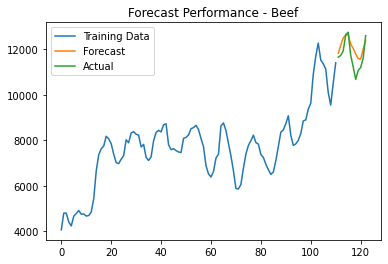

In [ ]:
x = np.arange(beef.shape[0])
plt.plot(x[:-12], train_b['price'])
plt.plot(x[-12:], forecast_b)
plt.plot(x[-12:], test_b['price'])
plt.title('Forecast Performance - Beef')
plt.legend(['Training Data','Forecast','Actual'])

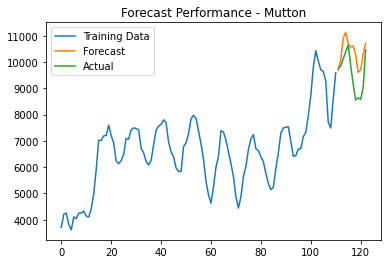

In [ ]:
x = np.arange(mutton.shape[0])
plt.plot(x[:-12], train_m['price'])
plt.plot(x[-12:], forecast_m)
plt.plot(x[-12:], test_m['price'])
plt.title('Forecast Performance - Mutton')
plt.legend(['Training Data','Forecast','Actual'])

In [ ]:
test_m['price']

223     9763.0
225     9836.0
227    10125.0
229    10385.0
231    10648.0
233     9864.0
235     9169.0
237     8551.0
239     8632.0
241     8579.0
243     9034.0
245    10459.0
Name: price, dtype: float64

In [ ]:
print('Mutton RMSE:', np.sqrt(mean_squared_error(test_m['price'], forecast_m)))
print('Beef RMSE:', np.sqrt(mean_squared_error(test_b['price'], forecast_b)))

Mutton RMSE: 940.7704088034307
Beef RMSE: 525.0400757254529


## Prophet

In [ ]:
m = Prophet()
m.fit(df)